# 1
**线性回归逻辑回归算法的评价指标有哪些，如何定义？**

MSE，均方误差

$$MSE = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^2$$

预测值和真实值之差的平方和的均值。MSE 越小，说明模型的预测误差越小。m是样本数，yi是真实值，yhat是预测值

RMSE，均方根误差

MSE的平方根，他和真实值有相同的量纲，便于直观的比较。

MAE，平均绝对误差

预测值和真实值之差的绝对值和的均值

$$MAE = \frac{1}{m}\sum_{i=1}^{m}|y^{(i)}-\hat{y}^{(i)}|$$

可以反映误差，但他对异常值不敏感，因为没有放大误差

R2，可决系数

$$ R2 = 1 - \frac{\sum_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^{m}(y^{(i)}-\bar{y})^2}$$

衡量模型对数据的拟合程度的指标，bary 是真实值的均值。R2 越接近 1，说明模型对数据的拟合程度越高，反之则越低。



# 2
**聚类算法的指标有哪些，分别如何定义？**

1. 纯度。是一种外部有效性指标，用于衡量聚类结果与真实类别的一致性。它的计算方法是将每个簇中数量最多的真实类别作为该簇的标签，然后计算所有簇中被正确标记的样本比例， N 是样本总数，k 是簇的个数，Ci​ 是第 i 个簇，Tj​ 是第 j 个真实类别。纯度越高，说明聚类结果与真实类别越吻合。  $$Purity = \frac{1}{N}\sum_{i=1}^{k}max_j|C_i\cap T_j|$$

2. 兰德系数RI。衡量两个聚类结果之间的相似度，计算方法是将所有样本两两配对，统计在两个聚类结果中都被分到同一个簇或者都被分到不同簇的配对比例，其中 a 是在两个聚类结果中都被分到同一个簇的配对数，b 是在两个聚类结果中都被分到不同簇的配对数，CN2​ 是从 N 个样本中任意取两个的组合数。RI 的取值范围是 [0,1]，越接近 1，说明两个聚类结果越相似。$$ RI = \frac{a+b}{C_N^2}$$

3. 调整兰德系数ARI。RI 的改进版本，用于消除随机因素对 RI 的影响。它的计算方法是将 RI 减去期望 RI，并除以最大 RI 减去期望 RI.其中 E[RI] 是期望 RI，可以根据两个聚类结果的混淆矩阵计算得到。ARI 的取值范围是 [−1,1]，越接近 1，说明两个聚类结果越相似；越接近 -1，说明两个聚类结果越相反；越接近 0，说明两个聚类结果没有相关性。$$ARI = \frac{RI - E[RI]}{max(RI) - E[RI]}$$

4. 轮廓系数SC。用于衡量样本与所属簇和其他簇之间的距离差异。它的计算方法是对每个样本，求出它与所属簇中其他样本的平均距离 a 和它与最近邻簇中所有样本的平均距离 b，然后计算 (b−a)/max(a,b) 的平均值作为 SC。其中 N 是样本总数。SC 的取值范围是 [−1,1]，越接近 1，说明样本与所属簇内距离小，与其他簇间距离大，聚类效果好；越接近 -1，说明样本与所属簇内距离大，与其他簇间距离小，聚类效果差；越接近 0，说明样本在簇的边界上，聚类效果一般。 $$ SC = \frac{1}{N}\sum_{i=1}^{N}\frac{b_i-a_i}{max(a_i,b_i)}$$ 

# 3
**设X为区间[0,100)中的P个均匀采样点，$Y=(X+5)^2+10+N，其中N是均值为 $\mu $, 标准差为$\sigma$的高斯随机噪声。试选取不同的变量，构造X和Y数据集，然后分别通过线性回归学习得到X和Y之间的不同的回归方程，并分析不同取值对回归方程误差的影响**

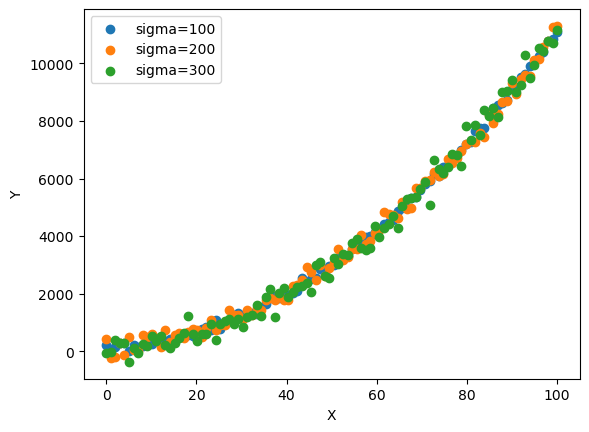

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Random
np.random.seed(0)

# X
P = 100
X = np.linspace(0, 100, P)

# f(x)
def f(x):
    return (x + 5)**2 + 10

# Different Noise Parameter
mu = 0
sigma1 = 100
sigma2 = 200
sigma3 = 300

N1 = np.random.normal(mu, sigma1, P)
N2 = np.random.normal(mu, sigma2, P)
N3 = np.random.normal(mu, sigma3, P)

Y1 = f(X) + N1
Y2 = f(X) + N2
Y3 = f(X) + N3

plt.scatter(X, Y1, label='sigma=100')
plt.scatter(X, Y2, label='sigma=200')
plt.scatter(X, Y3, label='sigma=300')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Y数据集1的回归方程为: Y = -1676.3442 + 110.8749X
Y数据集1的MSE为: 648025.1296
Y数据集1的RMSE为: 805.0001
Y数据集1的R2为: 0.9404

Y数据集2的回归方程为: Y = -1676.3442 + 110.8749X
Y数据集2的MSE为: 660012.5604
Y数据集2的RMSE为: 805.0001
Y数据集2的R2为: 0.9385

Y数据集3的回归方程为: Y = -1676.3442 + 110.8749X
Y数据集3的MSE为: 745951.6838
Y数据集3的RMSE为: 805.0001
Y数据集3的R2为: 0.9334


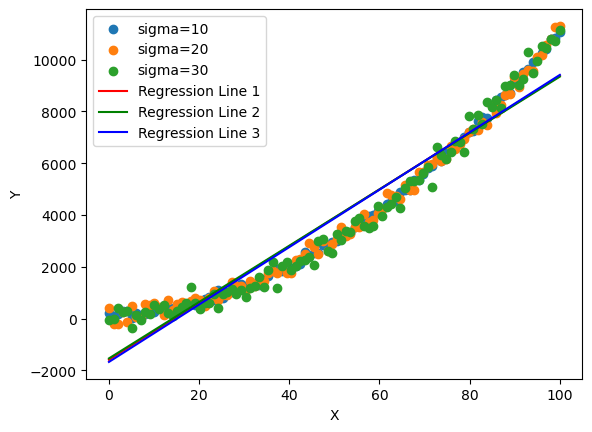

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# instantiate
linreg = LinearRegression()

# Regre with different Y
## 第一组数据集
linreg.fit(X.reshape(-1,1), Y1)
## 第一组预测值
y_pred1 = linreg.predict(X.reshape(-1,1))

mse1 = mean_squared_error(Y1, y_pred1)
rmse1 = np.sqrt(mse1)
r21 = r2_score(Y1, y_pred1)

## 第二组数据集
linreg.fit(X.reshape(-1,1), Y2)
## 第二组预测值
y_pred2 = linreg.predict(X.reshape(-1,1))

mse2 = mean_squared_error(Y2, y_pred1)
rmse2 = np.sqrt(mse1)
r22 = r2_score(Y2, y_pred1)

## 第三组数据集
linreg.fit(X.reshape(-1,1), Y3)
## 第三组预测值
y_pred3 = linreg.predict(X.reshape(-1,1))

mse3 = mean_squared_error(Y3, y_pred1)
rmse3 = np.sqrt(mse1)
r23 = r2_score(Y3, y_pred1)

# print
print("Y数据集1的回归方程为: Y = {:.4f} + {:.4f}X".format(linreg.intercept_, linreg.coef_[0]))
print("Y数据集1的MSE为: {:.4f}".format(mse1))
print("Y数据集1的RMSE为: {:.4f}".format(rmse1))
print("Y数据集1的R2为: {:.4f}".format(r21))
print()
print("Y数据集2的回归方程为: Y = {:.4f} + {:.4f}X".format(linreg.intercept_, linreg.coef_[0]))
print("Y数据集2的MSE为: {:.4f}".format(mse2))
print("Y数据集2的RMSE为: {:.4f}".format(rmse2))
print("Y数据集2的R2为: {:.4f}".format(r22))
print()
print("Y数据集3的回归方程为: Y = {:.4f} + {:.4f}X".format(linreg.intercept_, linreg.coef_[0]))
print("Y数据集3的MSE为: {:.4f}".format(mse3))
print("Y数据集3的RMSE为: {:.4f}".format(rmse3))
print("Y数据集3的R2为: {:.4f}".format(r23))


plt.scatter(X, Y1, label='sigma=10')
plt.scatter(X, Y2, label='sigma=20')
plt.scatter(X, Y3, label='sigma=30')
plt.plot(X, y_pred1, color='r', label='Regression Line 1')
plt.plot(X, y_pred2, color='g', label='Regression Line 2')
plt.plot(X, y_pred3, color='b', label='Regression Line 3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# 4
